# ExtraaLearn Project

## Importing necessary libraries and data

In [207]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,recall_score,make_scorer

import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [208]:
data_ed = pd.read_csv('ExtraaLearn.csv')

In [209]:
data_ed.head() #first five rows

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [210]:
data_ed.shape #columns and rows

(4612, 15)

The data has 4612 rows and 15 columns

In [211]:
data_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- There are no missing values in all columns since the number of rows in data match the non nulls in all the columns
- There are 10 object columns

In [212]:
data_ed.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- ID can be dropped as it won't be of much relevance to the model

In [213]:
#remove id column
data_ed.drop(columns='ID',inplace=True)

In [214]:
data_ed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


- Minimum ageis 18, however the 25%,50% are towards the older side showing that there are more older people.
- websites visit has some outliers towards the left as the 75% value is 5 while the max is 30
- page_views_per_visit is also skewed with outliers on the left. Majority of the records seem to be between 0 and 3.75
- A large number of the data contain only 0s for the status (probably over 60% of the data)

In [215]:
#check the unique values in each categorical column
cols = data_ed.loc[:, data_ed.dtypes == object].columns

for col in cols:
    print(data_ed[col].value_counts())
    print('-'*50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

- Checking the unique values in the object column
- There are more leads that are professionals than unemployed/students. 
- Most leads have their profile completed at least up to a medium level
- A low volume of yes for print media may indicate that not a lot of the leads read the newspaper or they are not reaching a lot of people through the newspaper
- There are more yes answers on the digital media interaction than the print media. 
- The target audience are more likely to interact with educational channels as they are looking to upskill hence why there are more yeses than other channels
- Not a lot of leads heard through referrals

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [216]:
df = data_ed.copy()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [217]:
#combination of box plot and histogram to view distribution and outliers
def histo_boxpl(df, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)})
    sns.boxplot(data=df, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=df, x=col, kde=True, ax=ax_hist)
    plt.show()

### Age

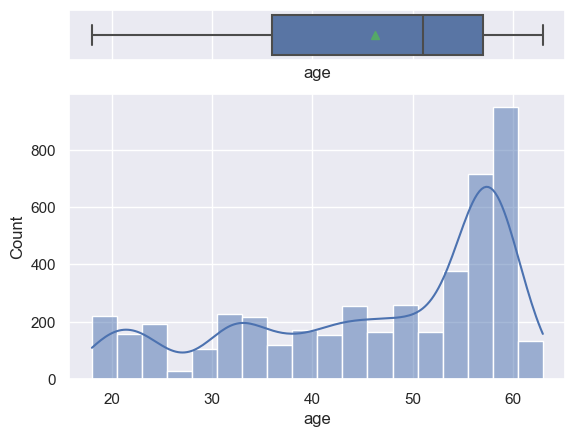

In [218]:
histo_boxpl(df,"age")

- The distributions is skewed to the left as there are more older leads which makes sense if there are more professionals than students but there are no outliers

### Website Visits

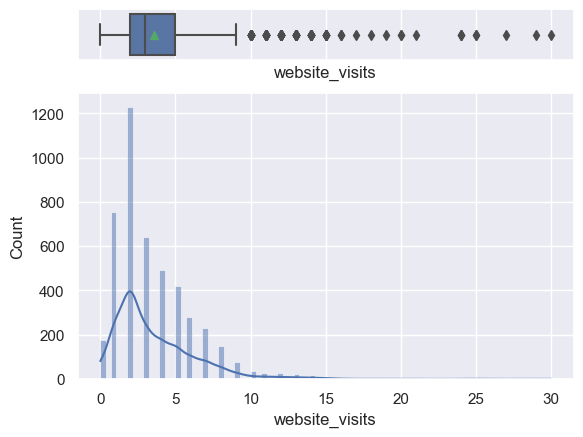

In [219]:
histo_boxpl(df,'website_visits')

- Looking at the box plot, there are several outliers and the data is right skewed
- Most leads visit the website between 0 to 9 times. 


In [220]:
df.website_visits.value_counts(normalize=True)

2     0.266479
1     0.163703
3     0.138985
4     0.107112
5     0.091500
6     0.061145
7     0.050304
0     0.037728
8     0.032741
9     0.016912
10    0.007372
11    0.006288
12    0.005421
13    0.004987
14    0.003686
15    0.001951
24    0.000650
16    0.000650
25    0.000434
20    0.000434
30    0.000217
18    0.000217
27    0.000217
21    0.000217
17    0.000217
19    0.000217
29    0.000217
Name: website_visits, dtype: float64

- 65% of the leads visited the website between 1 and 4 times. Most leads visited only twice - 
- Percentage of visits that are 17 or greater are less
- ExtraaLearn needs may need to create more awareness of the website so leads can visit more

### Time Spent on Website

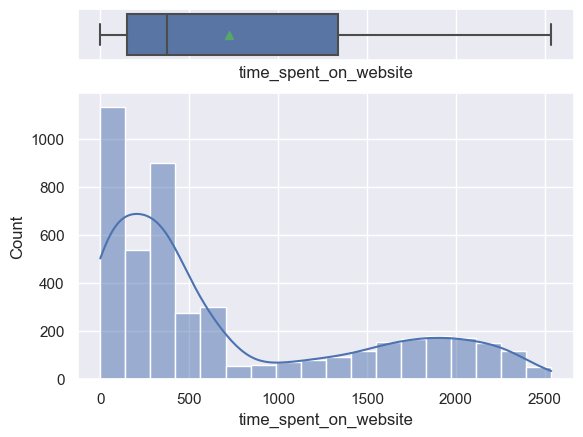

In [221]:
 histo_boxpl(df,'time_spent_on_website')

- Most people spend less time on the website which could mean the website is not engaging enough or its not very informative

### Page views per visit

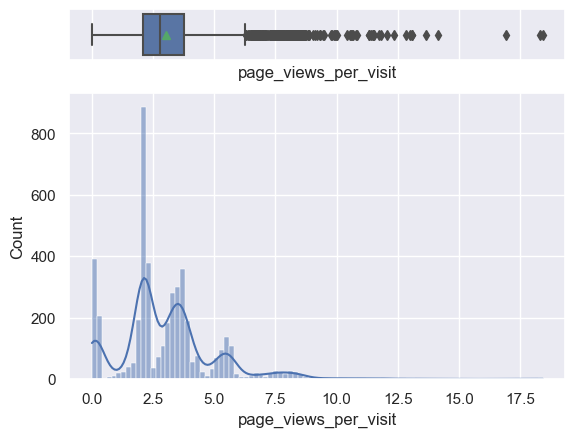

In [222]:
 histo_boxpl(df,'page_views_per_visit')

- There are a lot of outliers in this field 
- Most people on average visit around 2 -3 pages per visit. which ties with the statement above that people don't spend a lot of time on the company's website. 

In [223]:
#checking outliers across the dataset
def check_outlier (data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

In [224]:
check_outlier(df)

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age                        0
current_occupation         0
digital_media              0
educational_channels       0
first_interaction          0
last_activity              0
page_views_per_visit     257
print_media_type1          0
print_media_type2          0
profile_completed          0
referral                   0
status                     0
time_spent_on_website      0
website_visits           154
dtype: int64

- Page views per visit and website visits have outliers, roughly about 3%-5%

In [225]:
#define barplot for categorical columns
def barplt(df, col):
    order_d = df.groupby(col).size().sort_values().index[::-1]
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df, x=col,order=order_d).set_title(col+ " by category")
    plt.xticks(rotation=90,fontsize=15)

### Print Media Type 1

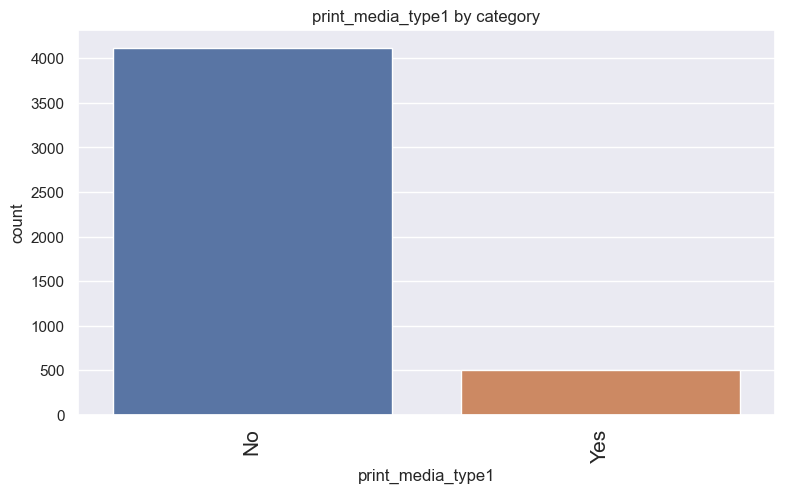

In [226]:
barplt(df,'print_media_type1')

In [227]:
df['print_media_type1'].value_counts()

No     4115
Yes     497
Name: print_media_type1, dtype: int64

- A lot(almost 90%) of the leads have not seen the ad in the newspaper.
- This could either mean not a lot of leads read the newspaper or the ad is not in a strategic position in the newspaper(maybe a tiny column that could easily be missed)

### Print Media Type 2

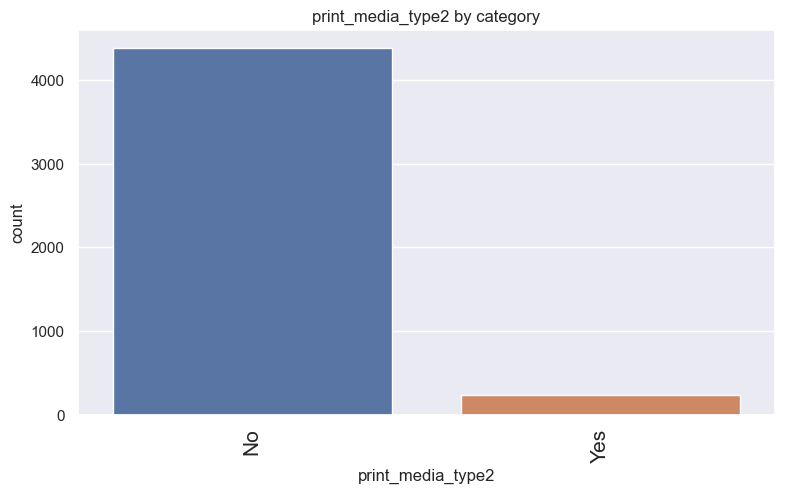

In [228]:
barplt(df,'print_media_type2')

- print media type 2 is magazines and like the newspaper category, there is a larger percentage of NOs than yes meaning not a lot of leads have seen the ad in the magazines

### Digital Media

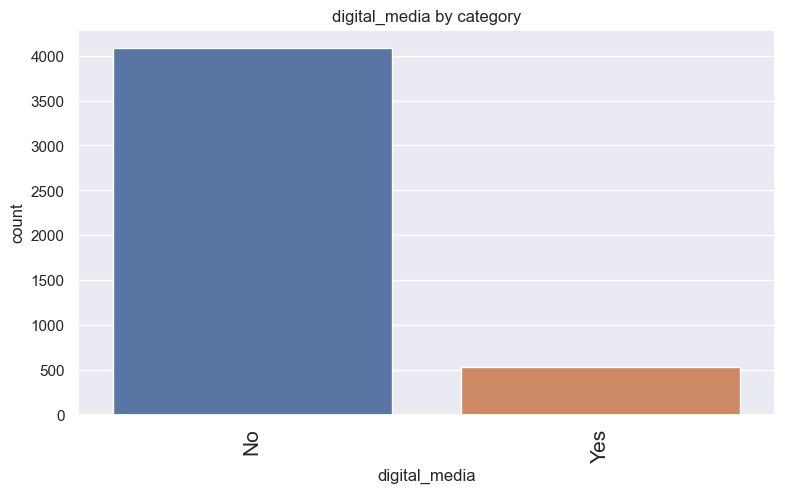

In [229]:
barplt(df,'digital_media')

- The yes category for the digital media seems to more compared to the other channels which make sense as people tend to use digital platforms(their phones) more than they read newspapers or magazines.
- Looking at the low turnout of yes in all the categories shows that ExtraaLearn needs to create more awareness across all channels

### Current Occupation

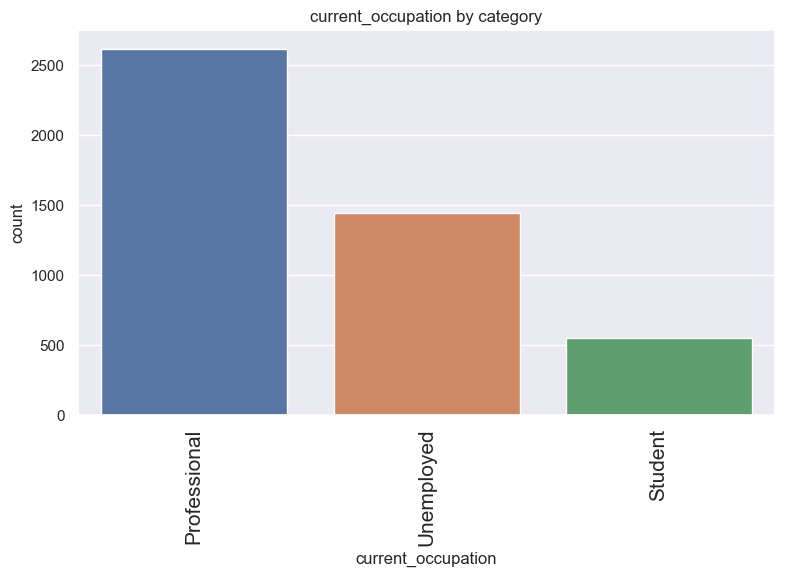

In [230]:
barplt(df,'current_occupation')

In [231]:
df['current_occupation'].value_counts(normalize=True)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64

- There are more professionals(over 50%) than unemployed or students which makes sense because professionals are always looking for ways to upskill, unemployed people may also want to gain more education to help them find a job or change industries

### Last Activity

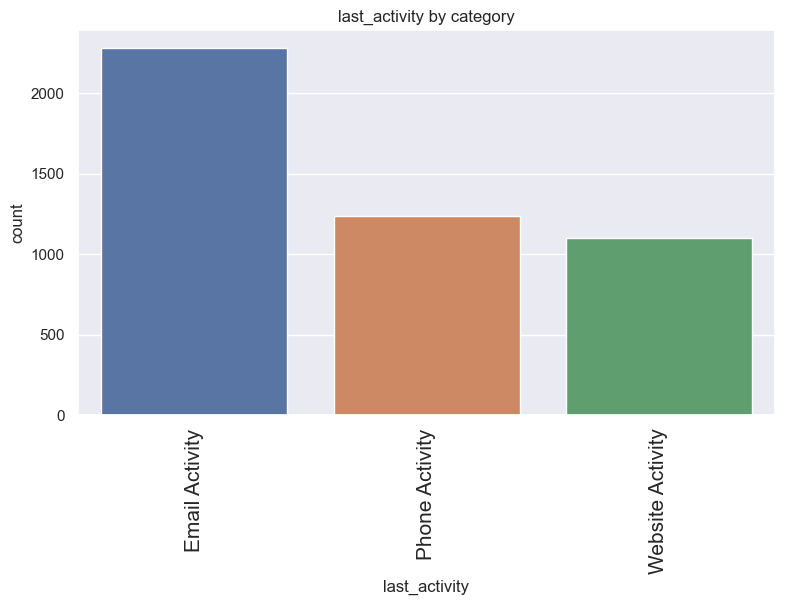

In [232]:
barplt(df,'last_activity')

- A large percentage of the leads last interacted with ExtraaLearn through emails which could include the company sending information the lead via email. 

### Profile Completed

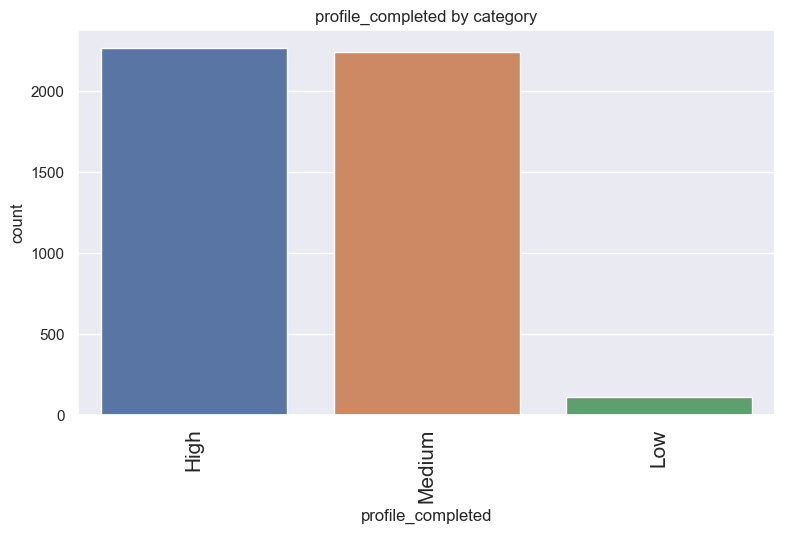

In [233]:
barplt(df,'profile_completed')

- A lot of people have completed their profile which is positive, also gives the company more knowledge of the lead. This can be used in advertising courses

### Referral

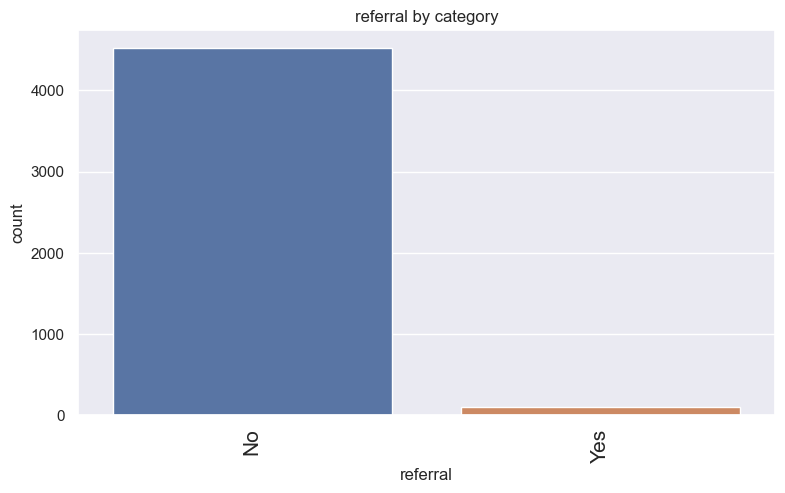

In [234]:
barplt(df,'referral')

In [235]:
df['referral'].value_counts(normalize=True)

No     0.979835
Yes    0.020165
Name: referral, dtype: float64

- A very low number of Yes in comparison to No. Almost all of the leads had not heard about ExtraaLearn from a reference.
- This may mean that current customers are not very satisfied or the company needs to do more to encourage customers to refer? e.g a bonus or credits towards a course?

### Status

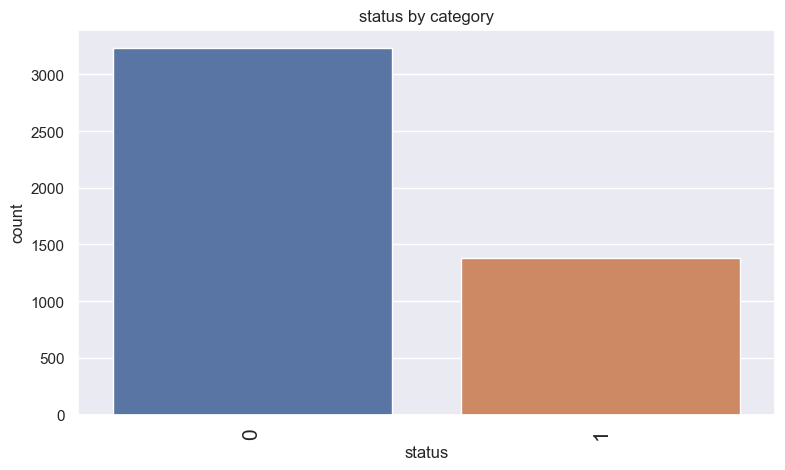

In [236]:
barplt(df,'status')

- only 30% of the leads were converted to a lead which means the data is imbalanced 

In [237]:
#a stacked barplot to visualise categorical variables and status
def stack_barplt(data,feature,stat='status',figsize=(10,6)):
    (pd.crosstab(data[feature],data[stat],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
    plt.legend(loc="lower right")
    plt.ylabel(stat)

### Current Occupation By Status

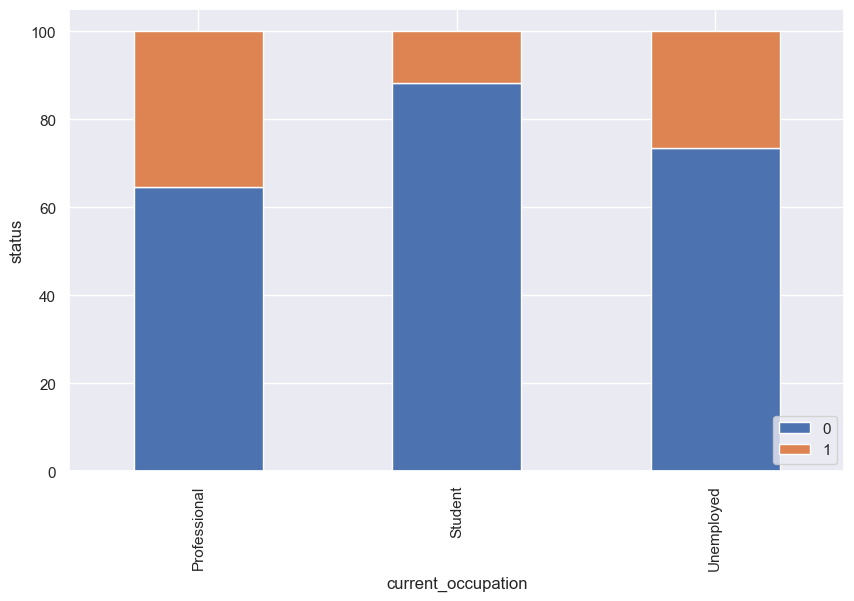

In [238]:
stack_barplt(df,'current_occupation')

- The professionals convert more, followed by the unmployed. This makes sense seeing that majority of the leads are professionals.The company can focus on people that fall into these categories

### First Interaction By Status

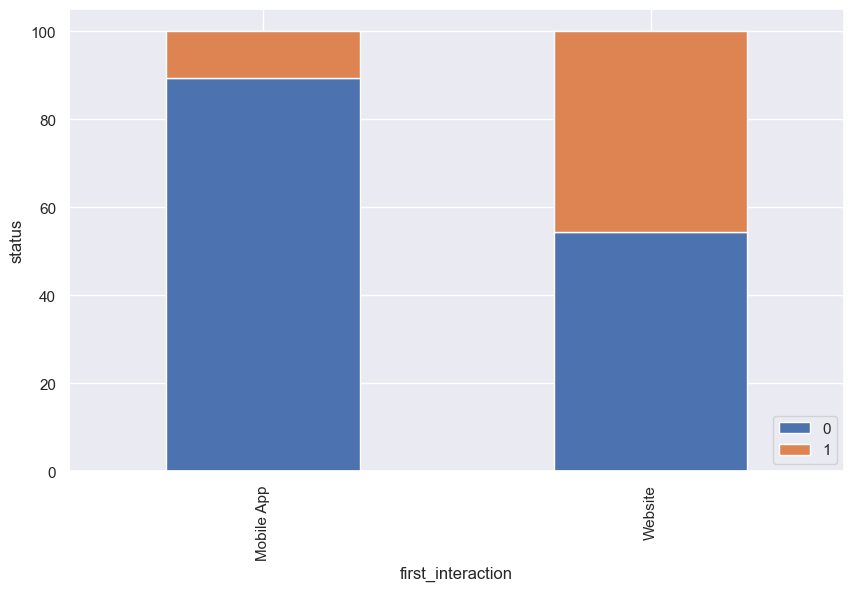

In [239]:
stack_barplt(df,'first_interaction')

- People who interacted first through the website have higher conversion rate compared to people who used the mobile app first showing that people probably prefer going on the website than using the app? Maybe the website contains more information and its easier to navigate

### Last Activity By Status

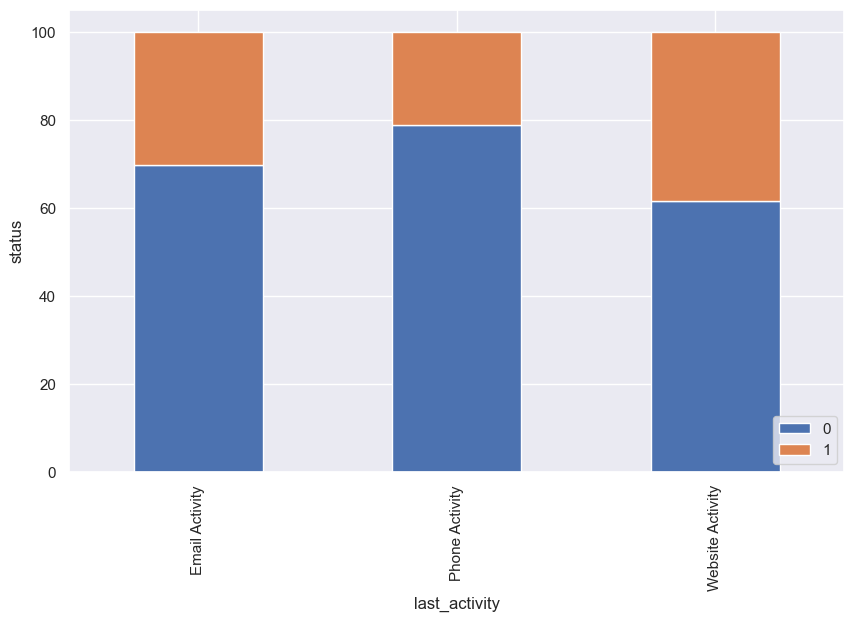

In [240]:
stack_barplt(df,'last_activity')

- This ties with first interaction. People who interacted last with the website(maybe web chat) have a higher conversion rate, this may also be due to people updating their profiles as seen in previous charts that more leads have completed their profiles
- People may also prefer the website virtual chat because they get quick answers as opposed to waiting on a phonecall to get answers from an agent or sending emails without immediate response. 

### Print Media Type 1 By Status

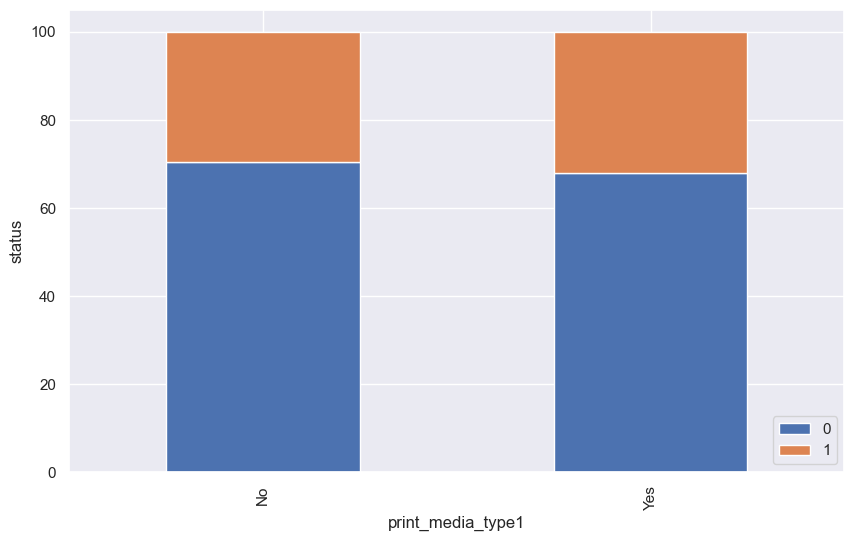

In [241]:
stack_barplt(df,'print_media_type1')

### Print Media Type 2 By Status

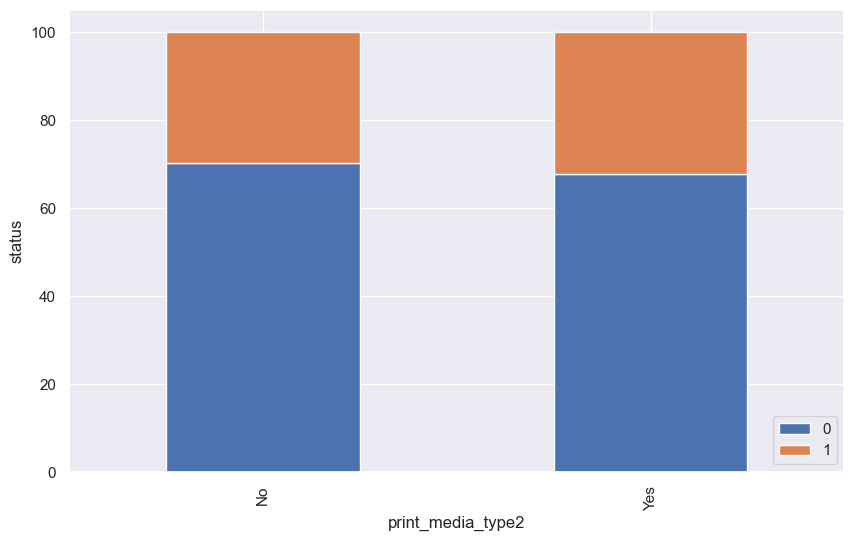

In [242]:
stack_barplt(df,'print_media_type2')

### Digital Media By Status

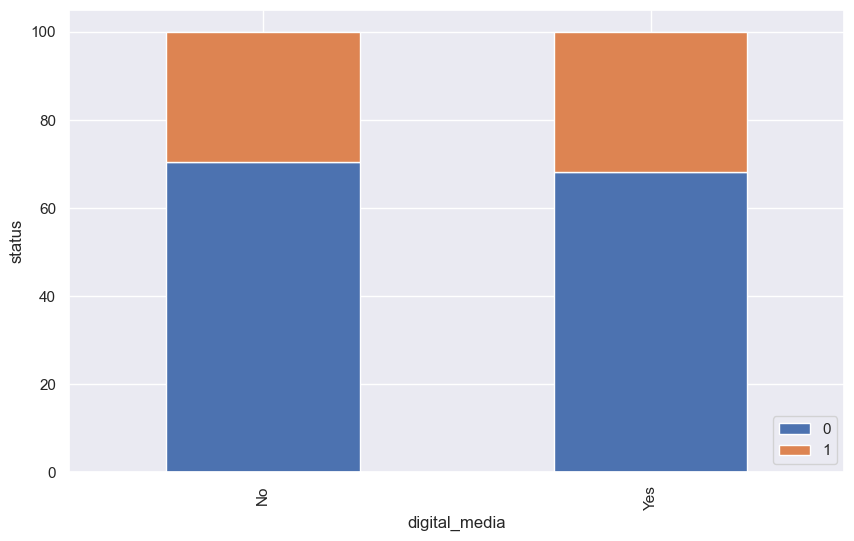

In [243]:
stack_barplt(df,'digital_media')

- All the media channels have similar percentages of conversion in No and yes categories which ties back to the response of the leads on whether they had seen the ad or not. If the leads have not seen the ad, converting them may be more difficult. 

### Referral By Status

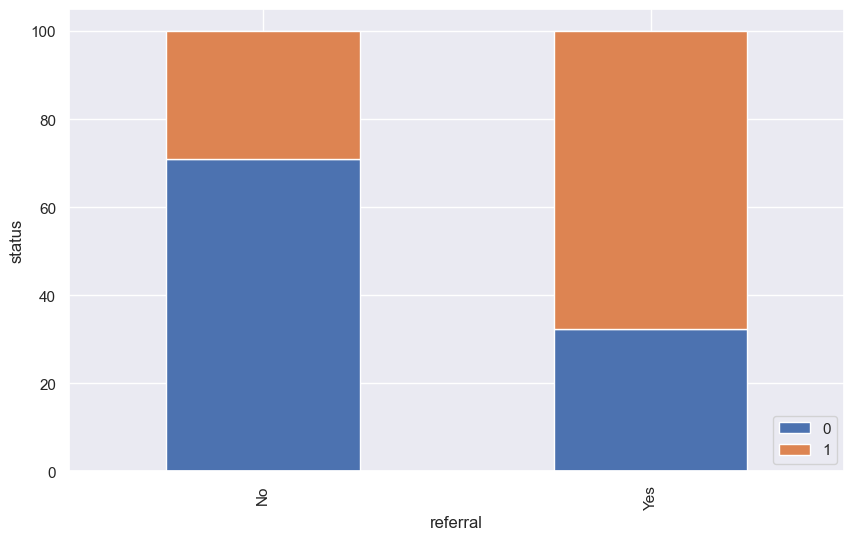

In [244]:
stack_barplt(df,'referral')

- Even though not a lot of people came from referrals, the ones who did have a higher conversion rate
- This may mean they trust the reference more than just an ad. The company should work more on getting existing customers to refer the company to their friends/colleagues/families e.t.c 

### Profile Completed By Status

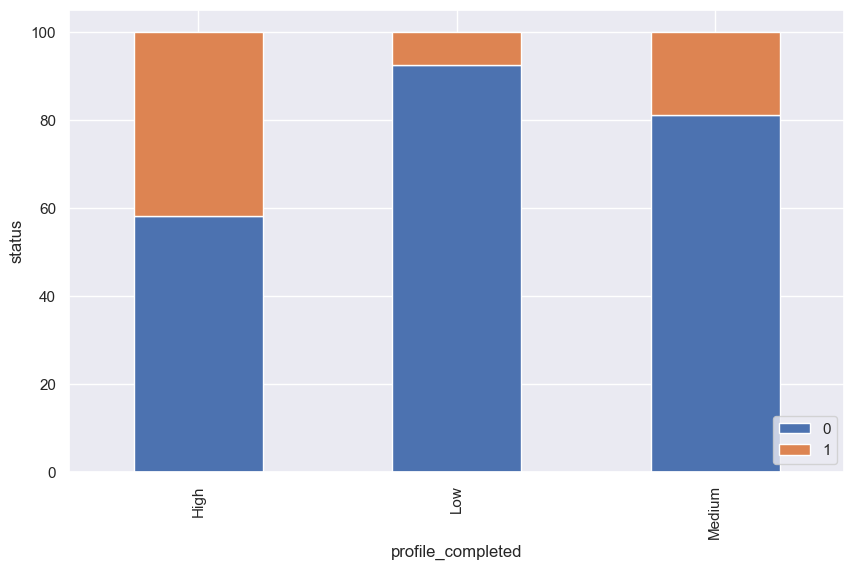

In [245]:
stack_barplt(df,'profile_completed')

- Leads who have completed their profile to a high level have higher conversion rate
- Completing the profile allows the company tailor the service to the needs of the lead e.g suggesting possible courses to take.

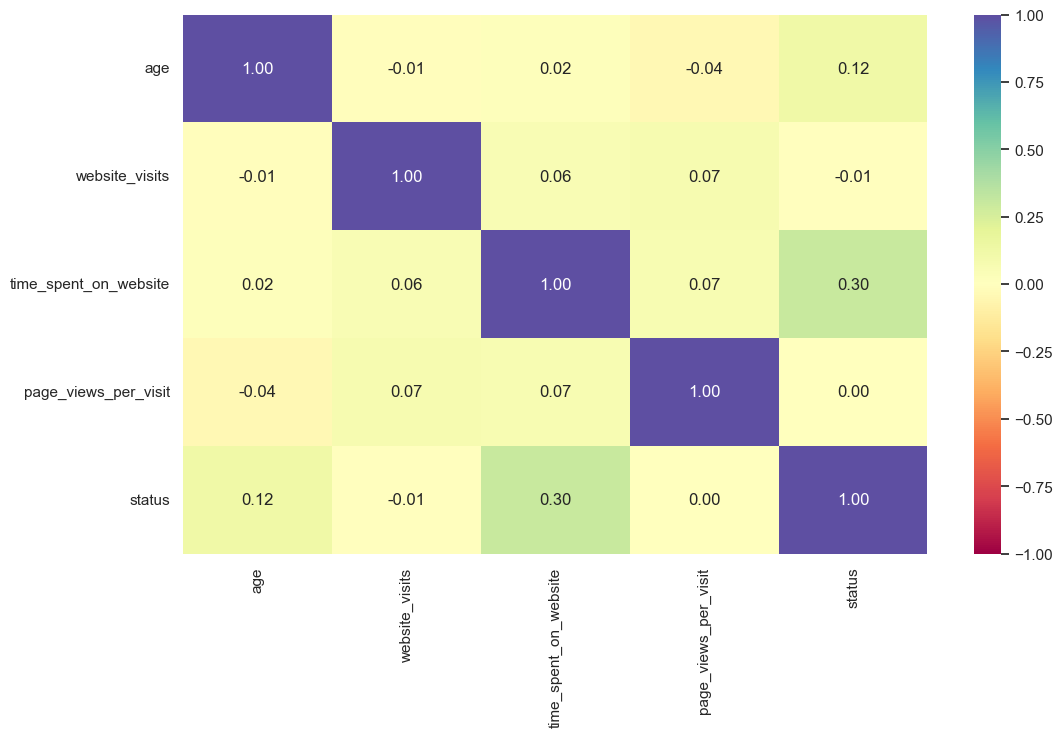

In [246]:
#correlation matrix between all variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is some correlation between status and time spent on website
- There is also a weak positive correlation between status and age. Older people are more likely to convert because they are professionals with experience

### Preparing data for model

In [247]:

#get dummies for categorical columns
cols_dum=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']
df = pd.get_dummies(data = df, columns = cols_dum, drop_first = True)      

#map yes and no for columns with only two categories
cols_map=['print_media_type1','print_media_type2','digital_media','educational_channels','referral']
maps = {'Yes': 1, 'No':0}

for col in cols_map:
    df[col]=df[col].map(maps)



In [248]:
#separate target and independent variables
X = df.drop(columns='status')
Y = df['status']


In [249]:
# 70:30 ratio split for train and test data
#stratified technique to cater for imbalanced class
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)


In [250]:
#create a confusion matrix function to allow for multiple reuse 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [251]:
#class weight signifies that data is not balanced and more weight should be giving to class 1
model_tree = DecisionTreeClassifier(class_weight = {0:0.30,1:0.70},random_state=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



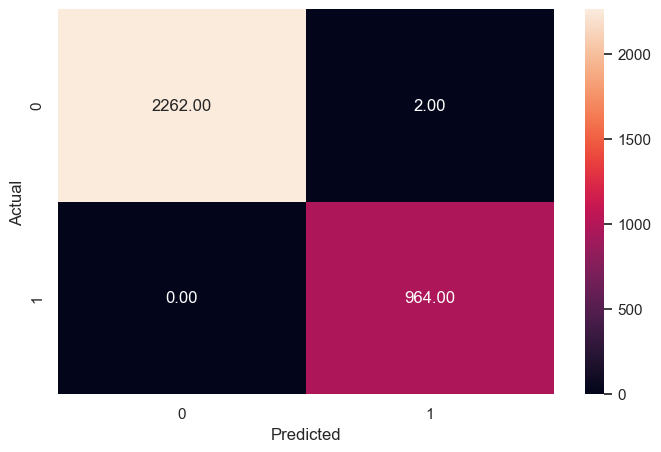

In [252]:
 # Checking performance on the training dataset
pred_train_tree = model_tree.predict(X_train)
metrics_score(y_train, pred_train_tree)

- Model is overfitting as there is almost has no errors
- It all seems too good to be true as its giving 100% score on all the metrics
- It means the model has learnt the training data perfectly due to the trees growing extensively

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.65      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.79      0.79      0.79      1384



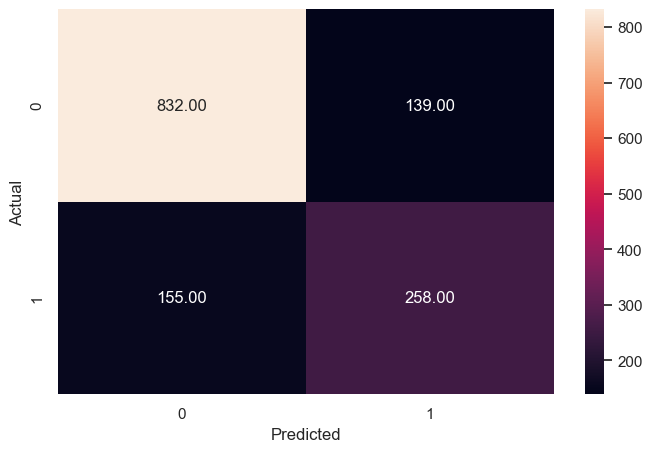

In [253]:
pred_test_tree = model_tree.predict(X_test)
metrics_score(y_test, pred_test_tree)

- Comparing the performance on the training data to the test data shows that the model is overfitting
- The model works very well on the training data with a recall of 1 but does not generalise on the test data as it has a recall of 0.64
- looking at the precision, 34% of the time, the model might be wrong and that can come at a cost to the business
- Tuning the hyperparameters might reduce overfitting

## Do we need to prune the tree?

In [254]:
# Choose the type of classifier.
#class weight allows us to specify that there is imbalance in the dataset so the model should give more weight to class 1
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters 
parameters = {
    "max_depth": np.arange(1,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [5, 10, 20, 25],
}
# Running grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# clf - best esitimators
estimator = grid_obj.best_estimator_

# fit algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       max_leaf_nodes=50, min_samples_split=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



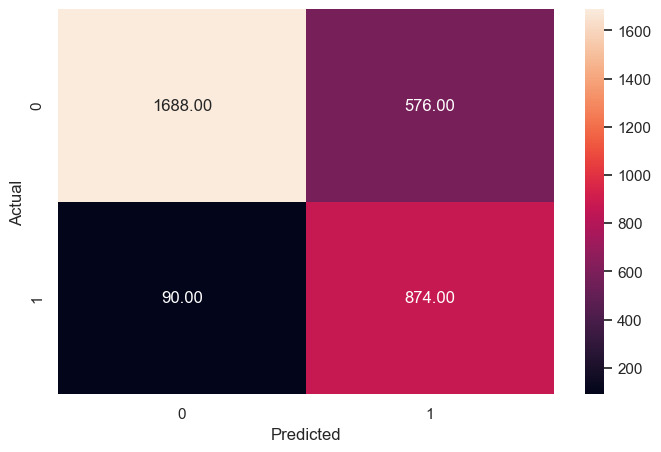

In [255]:
#predict on train data
pred_train_tree_tuned = estimator.predict(X_train)
metrics_score(y_train,pred_train_tree_tuned)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



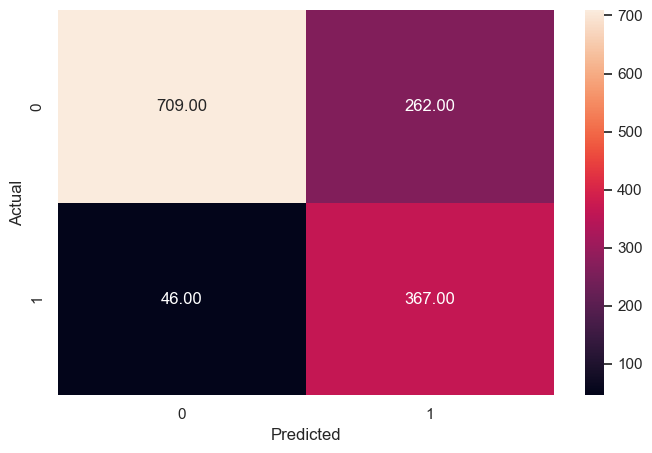

In [256]:
#predict on test data
pred_test_tree_tuned = estimator.predict(X_test)
metrics_score(y_test, pred_test_tree_tuned)


- The recall for the training is now close to the recall on the test data. However, the false negative is high

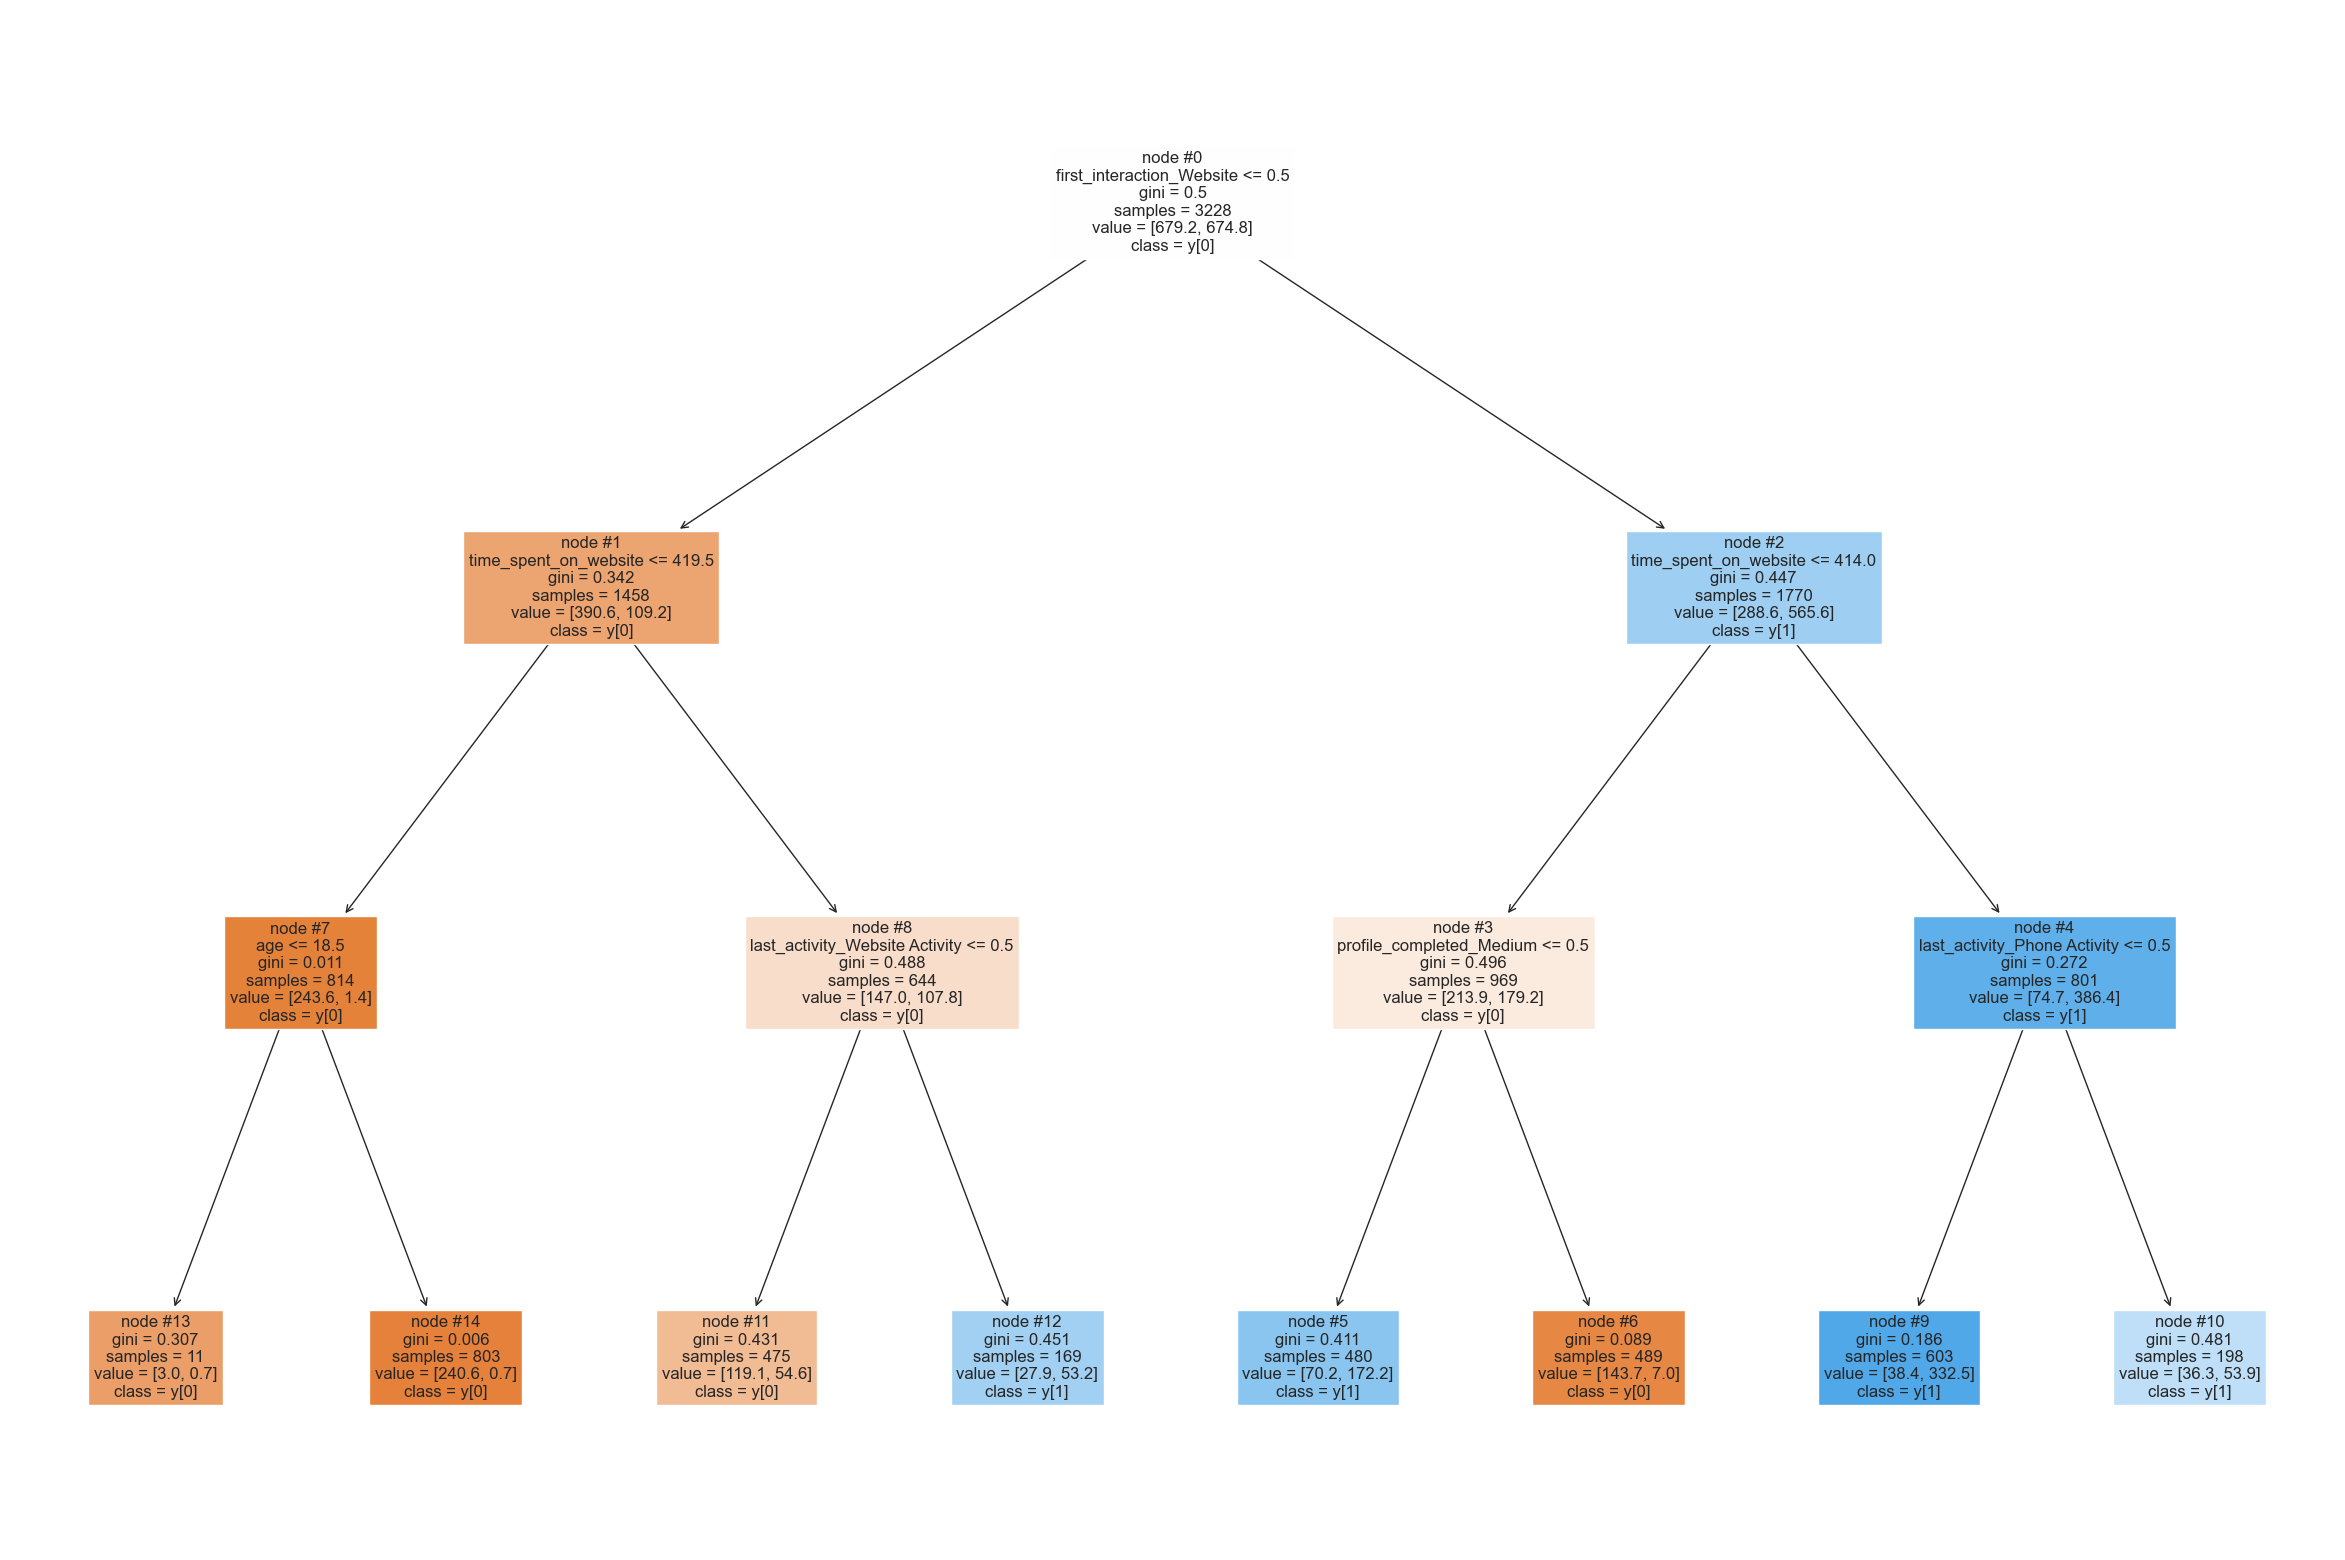

In [257]:
#viewing the decision tree
features = list(X_train.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

Top nodes interactiob on website and time spent on website. These seem like good factors to split the tree by

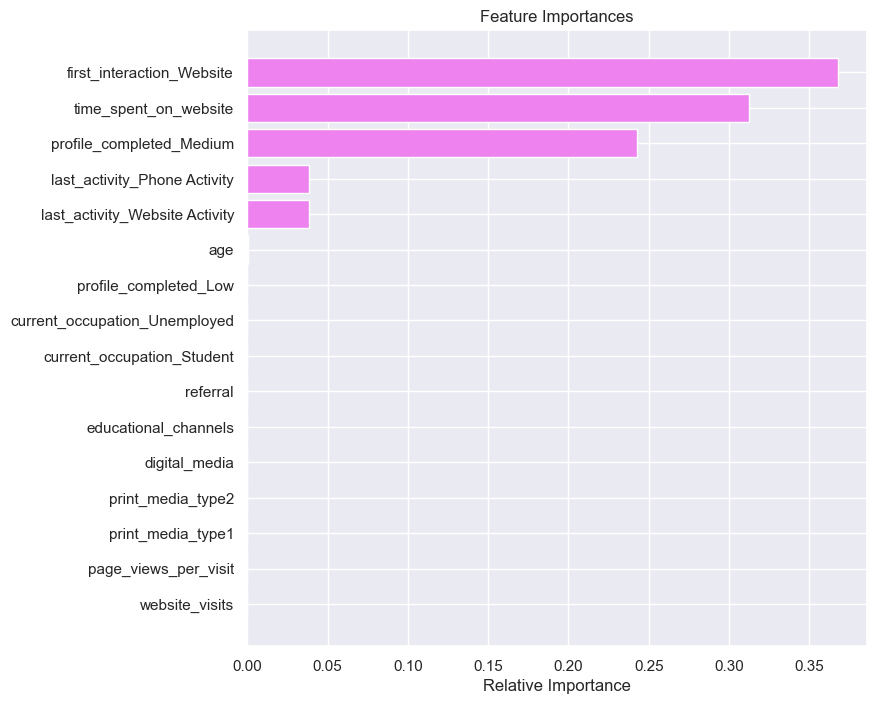

In [258]:
# important features on decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The two most important features are time spent on website and first interaction(website) showing that the website is a good indicator of lead willing to convert. The more time a lead spends on a website, the more they get to see what the company offers and in turn convert to a customer.
- Profile completed , again leads that complete their profile can be contacted more by the company, the company can also send them courses to register making it a good chance of converting
- Age- Older people(the data contains more older people) are more likely to convert because they are professionals, who already have industry experience but just need to upskill

## Building a Random Forest model

In [259]:
#random forest classifier
rf_estimator = RandomForestClassifier(  random_state = 1,class_weight = {0:0.30,1:0.70})

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



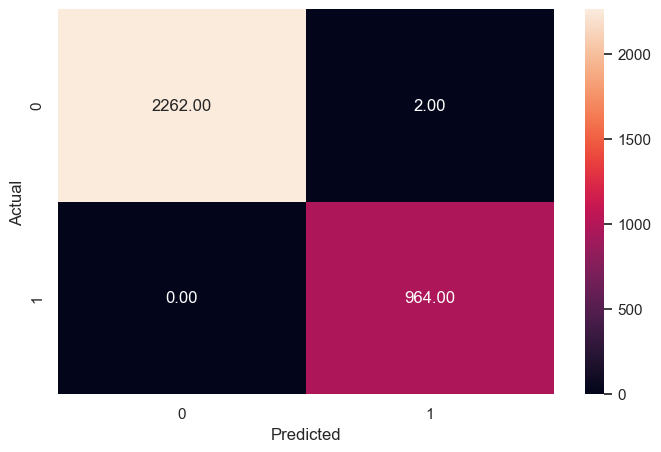

In [260]:
#preduct on train data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

- The RF model is giving a 100% score for all the metrics on the training data

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



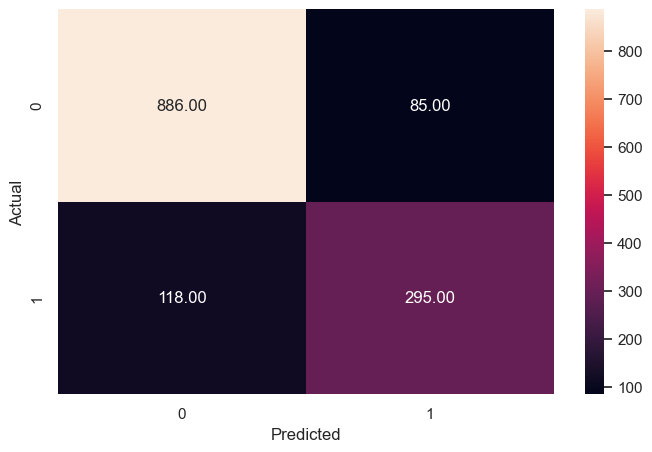

In [261]:
#predict on test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

The RF model seems to be overfitting as the recall on the training data is 1 while the one on the test data for class 1 is 0.71

## Do we need to prune the tree?

In [262]:
# random forest classifier
rf_tuned = RandomForestClassifier( random_state = 1)

# Gridparameters
params_rf = {  
        "n_estimators": [110, 120],
        "max_depth": [6, 7],
        "min_samples_leaf": [20,25],
        "max_features": [0.8, 0.9, 'auto'],
        "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
}


#  recall score is what we're focusing on and not precision due to the need to reduce false negatives
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# grid search
grid_obj = GridSearchCV(rf_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set classifier 
rf_tuned = grid_obj.best_estimator_

In [263]:
#fit 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=0.8,
                       min_samples_leaf=25, n_estimators=120, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.68      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



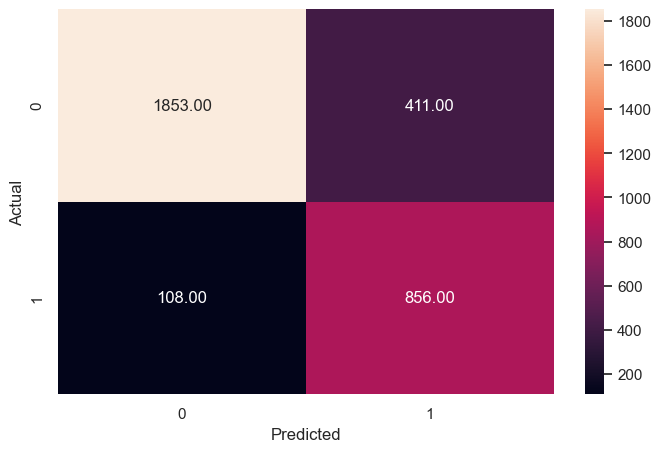

In [264]:
#predict on train data
y_pred_train_rf_tuned = rf_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)


              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.82      1384



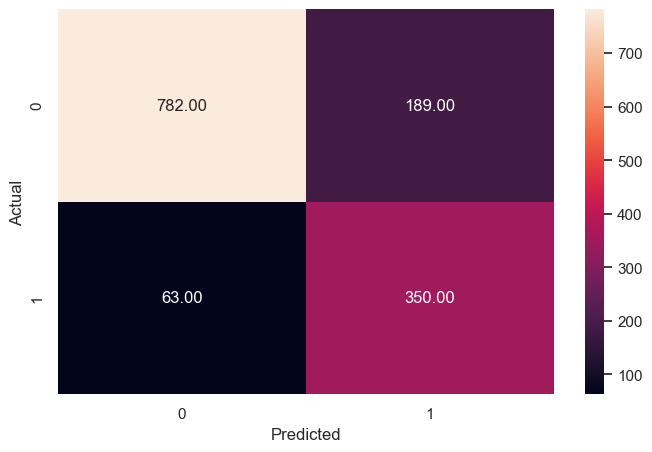

In [265]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

- This model seems to be performing better as there is little difference between the scores on the training data vs the test data. 
- The recall for class 1 on the test data has also increased 0.71 to 0.85

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance'>

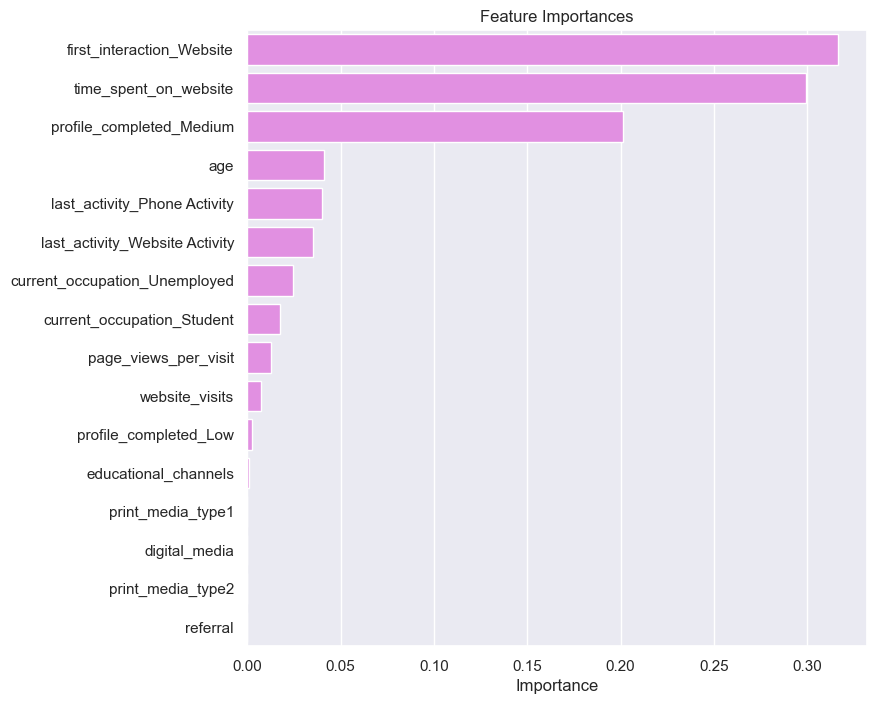

In [266]:
#use feature importance of random forest
importances = rf_tuned.feature_importances_

#select all columns in the train dataset
columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

- The top two most important features are similar to the decision tree - Time spent on website and first interaction(website) showing that the website is a good indicator of conversion
- However the next 2 are pages viewed per visit and age unlike the decision tree


## Actionable Insights and Recommendations

- Leads do not visit the website very often. Most people visit between 0 to 9 times. 65% of the leads visited at most 4 times. They also do not visit a lot of pages on the website
- Out of all the media types, leads have seen ads in the digital media compared to other media types, the company should put ads in strategic positions
- 56% of the leads are professionals, these could be the target for the company. Advertise more to professionals who are seeking to upskill e.g professionals who search for courses online
- A lot of leads have completed their profile which is positive, also means the company can suggest possible courses based on each lead’s profile and give them access to teaser courses to encourage them to subscribe/buy
- 97% of the people did not hear about the company from a reference which means the company should create a better referral program. e.g refer for a bonus or refer for credit towards an online course. This creates more awareness of the business in addition to the ads.
- The leads who first interacted through the website have a higher conversion rate. The company should focus more on this channel by directing leads to the website. On the website, the virtual chat can pop up with a “how may I help you” message which engages the lead by providing answer to their questions. 
- On the other hand, the company can also optimize the mobile app, make it easy for people to be converted into a customer e.g register for a course and pay within the app. The mobile app can also be advertised on the website to direct people towards this channel
- The analysis has shown that time spent on the website is an important factor in determining the conversion of a lead. The company should focus on optimizing the website, including engaging contents and making it user friendly 
